# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [2]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
from rdkit import Chem
from rdkit.Chem import inchi

# To gain access function in src directory
%run ../src/smiles_processing.py

# Path to input and output files
input_file_path = "/home/chiamaka/ersilia/Ersilia_model_validation/data/raw_smile_data.csv"
output_file_path = "/home/chiamaka/ersilia/Ersilia_model_validation/data/smiles_inchikey.csv"

In [3]:
# Read the input file
input_data = pd.read_csv(input_file_path, header=0, usecols=[0])

# Extract the rows into a list
input_rows = input_data.squeeze().tolist()

In [4]:
# Standardise smile
stand_smile = standardise_smiles(input_rows)

# Remove 'nan' values
filtered_smile = [value for value in stand_smile if not pd.isna(value)]

RDKit ERROR: [19:56:30] Can't kekulize mol.  Unkekulized atoms: 3 10
[19:56:30] Can't kekulize mol.  Unkekulized atoms: 3 10

RDKit ERROR: 


In [5]:
# Create lists to store Inchikey
inchikey_list = []

# Calculate each Inchikey per molecule
for smiles in filtered_smile:
    mol = Chem.MolFromSmiles(smiles)
    inchikey = inchi.MolToInchiKey(mol)
    inchikey_list.append(inchikey)

In [6]:
# Store smile and inchikey in a zipped list
final_data = list(zip(filtered_smile[0:1000], inchikey_list[0:1000]))

# Write the data to the CSV file
with open(input_file_path, 'w', newline='') as f:
    csv_writer = csv.writer(f)
    
    # Write header
    csv_writer.writerow(['smiles', 'inchikey'])
    
    # Write data
    csv_writer.writerows(final_data)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

# eos9tyg Model

In [8]:
# Load model predictions
eos9tyg_prediction_data = pd.read_csv("../data/eos9tyg_data/eos9tyg_prediction.csv", header=0)

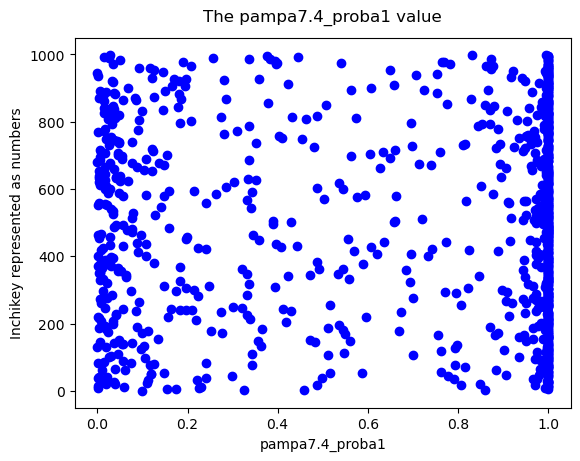

In [10]:
# Scatter plot showing predictions
plt.scatter(eos9tyg_prediction_data["pampa7.4_proba1"], range(len(eos9tyg_prediction_data["key"])), color='blue', marker='o')
plt.xlabel('pampa7.4_proba1')
plt.ylabel("Inchikey represented as numbers")
plt.title("The pampa7.4_proba1 value", pad=12)

plt.show()

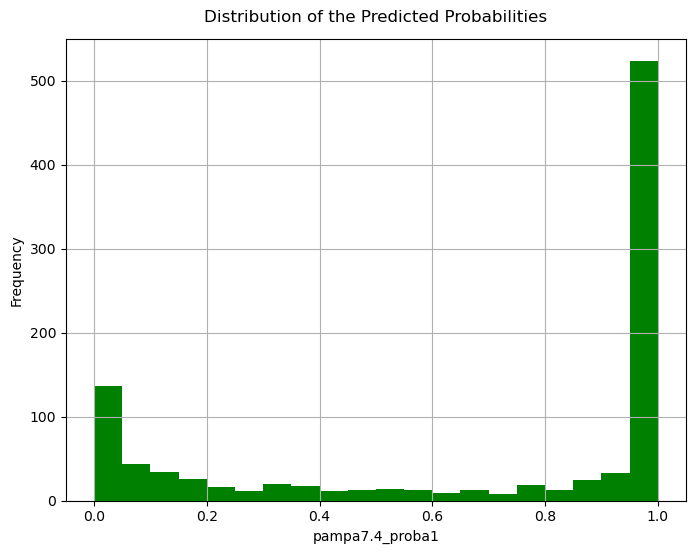

In [12]:
# Plot the histogram

plt.figure(figsize=(8, 6))

plt.hist(eos9tyg_prediction_data["pampa7.4_proba1"], bins=20, color='green')
plt.title('Distribution of the Predicted Probabilities', pad=12)
plt.xlabel('pampa7.4_proba1')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()